# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! In this tutorial, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial or use "File -> Open in playground mode" to play with it yourself.


# Install detectron2

In [0]:
# install dependencies:
# (use +cu100 because colab is on CUDA 10.0)
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
!gcc --version


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 24kB/s 
     |████████████████████████████████| 4.1MB 37.7MB/s 
  Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
  Found existing installation: torchvision 0.5.0
    Uninstalling torchvision-0.5.0:
      Successfully uninstalled torchvision-0.5.0
     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=d8a336b574929cfefffe90f70c89fe66455e333fb3160b27bb6a45a77cefd7df
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-b8im7p2l
  Running command git 

In [0]:
# install detectron2:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2684 (delta 0), reused 1 (delta 0), pack-reused 2681
Receiving objects: 100% (2684/2684), 1.91 MiB | 20.39 MiB/s, done.
Resolving deltas: 100% (1817/1817), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.dev200205-cp36-none-any.whl size=34351 sha256=50e5ebbb0f09f56a83e926a5dbc54f22475f0417a0fe56368c3c4d93af0d5d15
  Stored in directory: /root/.cache/pip/wheels/4c/f7/c5/fb851b361f826c238dd596f546ac56b3ac8f90f87d39dd9e27
Successfully built fvcore
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
  Running setup.py develop for detectron2


In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Run a pre-trained detectron2 model

We first download a random image from the COCO dataset:

In [0]:
#!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

AttributeError: ignored

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [0]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [0]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
outputs["instances"].pred_classes
outputs["instances"].pred_boxes

Boxes(tensor([[153.6077,  25.5914, 243.3633, 148.8096],
        [ 75.5926,  27.7329, 237.5424, 155.4415],
        [ 34.5221,  79.1380,  92.3729, 143.0917],
        [ 13.6245,  77.8284, 133.8645, 153.2726]], device='cuda:0'))

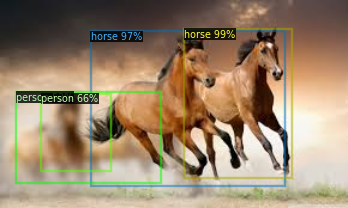

In [0]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [0]:
a=np.full((3,0), 7)

In [0]:
! python /content/detectron2_repo/demo/demo.py --config-file /content/detectron2_repo/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml --video-input /content/input.mp4 --output  /content/

[02/05 12:19:39 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='/content/detectron2_repo/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml', input=None, opts=[], output='/content/', video_input='/content/input.mp4', webcam=False)
[02/05 12:19:43 fvcore.common.checkpoint]: Loading checkpoint from detectron2://ImageNetPretrained/MSRA/R-50.pkl
[02/05 12:19:43 fvcore.common.file_io]: URL https://dl.fbaipublicfiles.com/detectron2/ImageNetPretrained/MSRA/R-50.pkl cached in /root/.torch/fvcore_cache/detectron2/ImageNetPretrained/MSRA/R-50.pkl
[02/05 12:19:43 d2.checkpoint.c2_model_loading]: Remapping C2 weights ......
[02/05 12:19:43 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.0.conv1.norm.bias            loaded from res2_0_branch2a_bn_beta           of shape (64,)
[02/05 12:19:43 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.0.conv1.norm.running_mean    loaded from res2_0_branch2a_bn_running_mean   of shape (64,)
[02/05 12:19:43 d2.checkpoin

1